In [8]:
import pandas as pd
from github import Github
from github import GithubException
import json
# def login(token):
#     g = Github(token)
#     return g;
# def getReadme(g,file_name):
#     repositories = g.search_repositories(query='language:rust')
#     file_object = open(file_name,'w')
#     cnt = 0
#     raw_data = []
#     for repo in repositories:
#         # if cnt == 780:
#         #     continue
#         try:
#             cnt = cnt+1
#             print(repo.stargazers_count,repo.full_name)
#             a = json.dumps({'full_name':repo.full_name,'owner':repo.owner.name,'stars':repo.stargazers_count,'readme':repo.get_readme().decoded_content.decode('utf-8')})
#             raw_data.append(a)
#             file_object.write(a)
#             file_object.write('\n')
#             print(cnt)
#         except GithubException:
#             continue
#         if cnt == 1000:
#             break
#     print(raw_data[0])
#     file_object.close()
#     return raw_data
#
# token = ''
# g = login(token)
# data = getReadme(g,'repo_readme.json')




86059 denoland/deno
1
73793 rust-lang/rust
2
53343 tauri-apps/tauri
3
42638 alacritty/alacritty
4
37822 sharkdp/bat
5
33927 BurntSushi/ripgrep
6
31437 rustdesk/rustdesk
7
31017 rust-lang/rustlings
8
30460 meilisearch/meilisearch
9
29961 starship/starship
10
29624 rust-unofficial/awesome-rust
11
25054 sharkdp/fd
12
24762 yewstack/yew
13
24476 swc-project/swc
14
21250 nushell/nushell
15
19935 lapce/lapce
16
19763 firecracker-microvm/firecracker
17
19650 xi-editor/xi-editor
18
19608 ogham/exa
19
19542 rome/tools
20
19503 dani-garcia/vaultwarden
21
19391 bevyengine/bevy
22
18820 SergioBenitez/Rocket
23
18026 tokio-rs/tokio
24
17381 facebook/relay
25
16638 diem/diem
26
16603 iced-rs/iced
27
16231 valeriansaliou/sonic
28
15606 actix/actix-web
29
15515 dandavison/delta
30
15479 helix-editor/helix
31
15027 vercel/turbo
32
14900 spacedriveapp/spacedrive
33
14378 surrealdb/surrealdb
34
13992 cube-js/cube.js
35
13569 Rigellute/spotify-tui
36
13314 Wilfred/difftastic
37
13260 sharkdp/hyperfine
38


In [9]:
import jsonlines
import re
real_data = []
with open('repo_readme.json','r') as files:
    for lint in files.readlines():
        real_data.append(json.loads(lint))
    #print(real_data)
# real_data = []
# for json_repo in data:
#     real_data.append(json.loads(json_repo))
for repo in real_data:
    repo['readme_proceed'] = re.sub('[,\.!?]', '', repo['readme'])
    repo['readme_proceed'] = repo['readme'].lower()
    # print(repo['readme_proceed'])

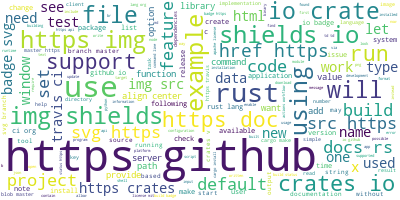

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
readme_data = [i['readme_proceed'] for i in real_data]
long_string = ','.join(readme_data)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [56]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['http', 'https','run','use','build','github', 'rust', 'com','io'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data_words = list(sent_to_words(readme_data))
# print(data_words)
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wuxiao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['deno', 'status', 'cirrus', 'status', 'twitter', 'handle', 'twitter', 'badge', 'discord', 'chat', 'img', 'shields', 'io', 'discord', 'logo', 'discord', 'style', 'social', 'discord', 'gg', 'deno', 'img', 'align', 'right', 'src', 'deno', 'land', 'logo', 'svg', 'height']


In [57]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 3), (10, 1), (11, 1), (12, 1), (13, 2), (14, 3), (15, 2), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 5), (24, 1), (25, 3), (26, 1), (27, 3), (28, 2), (29, 1)]


In [58]:
from pprint import pprint

# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"org" + 0.007*"io" + 0.006*"rs" + 0.006*"crates" + 0.005*"img" + '
  '0.005*"cargo" + 0.005*"svg" + 0.005*"docs" + 0.004*"install" + '
  '0.004*"badge"'),
 (1,
  '0.012*"io" + 0.010*"rs" + 0.008*"docs" + 0.007*"crates" + 0.006*"img" + '
  '0.006*"svg" + 0.006*"org" + 0.005*"cargo" + 0.005*"license" + '
  '0.004*"badge"'),
 (2,
  '0.007*"rs" + 0.007*"io" + 0.006*"img" + 0.006*"cargo" + 0.005*"org" + '
  '0.005*"svg" + 0.005*"crates" + 0.004*"docs" + 0.004*"install" + '
  '0.004*"code"'),
 (3,
  '0.009*"io" + 0.008*"cargo" + 0.007*"crates" + 0.007*"rs" + 0.005*"img" + '
  '0.005*"org" + 0.005*"license" + 0.005*"svg" + 0.004*"install" + '
  '0.004*"code"')]


In [27]:
import pyLDAvis.gensim_models
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(LDAvis_prepared)


/Users/wuxiao/.conda/envs/untitled/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Users/wuxiao/.conda/envs/untitled/lib/python3.10/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/wuxiao/.conda/envs/untitled/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/wuxiao/.conda/envs/untitled/lib/python3.10/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/wuxiao/.conda/envs/untitled/lib/py

In [28]:

import pickle


 # LDAvis_data_filepath = './results/ldavis_prepared_'+str(num_topics)

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
# with open(LDAvis_data_filepath, 'wb') as f:
#     pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

In [29]:
#get output_tab
print(lda_model.print_topics(10,5))
# for repo in real_data:
#     text = [word for word in repo['readme_proceed'].lower() if word not in stop_words]
#     bow = id2word.doc2bow(text)
#     repo['cate'] = lda_model.get_document_topics(bow=bow)
#     print(repo['cate'])

[(0, '0.007*"rs" + 0.007*"org" + 0.006*"crates" + 0.006*"svg" + 0.006*"img"'), (1, '0.010*"rs" + 0.008*"crates" + 0.007*"cargo" + 0.006*"img" + 0.006*"docs"'), (2, '0.006*"rs" + 0.006*"img" + 0.006*"docs" + 0.005*"crates" + 0.005*"org"'), (3, '0.007*"org" + 0.007*"cargo" + 0.006*"img" + 0.006*"rs" + 0.005*"crates"')]


In [54]:
categories= [[0,0],[0,0],[0,0],[0,0]]#count,starcount
example_repo = [[],[],[],[]]
max_stars= [0,0,0,0]
for i in range(len(data_words)):
    words =  id2word.doc2bow(data_words[i]);
    cate = lda_model.get_document_topics(words)
    identify = 0;
    max_score = cate[0][1]
    for choice in cate:
        if choice[1] > max_score:
            max_score = choice[1]
            identify = choice[0]
    real_data[i]['category'] = identify
    if len(example_repo[identify]) < 5:
        example_repo[identify].append(real_data[i]['full_name'])
    if max_stars[identify] <real_data[i]['stars']:
        max_stars[identify] = real_data[i]['stars']
    categories[identify][0] +=1
    categories[identify][1] += real_data[i]['stars']
    # print(lda_model.get_document_topics(words))
print(categories)
print(example_repo)

[[583, 1807891], [156, 530242], [130, 456290], [129, 424340]]
[['denoland/deno', 'sharkdp/bat', 'rust-lang/rustlings', 'meilisearch/meilisearch', 'rust-unofficial/awesome-rust'], ['rust-lang/rust', 'rustdesk/rustdesk', 'sharkdp/fd', 'tokio-rs/tokio', 'actix/actix-web'], ['tauri-apps/tauri', 'BurntSushi/ripgrep', 'nushell/nushell', 'dani-garcia/vaultwarden', 'SergioBenitez/Rocket'], ['alacritty/alacritty', 'starship/starship', 'swc-project/swc', 'firecracker-microvm/firecracker', 'RustPython/RustPython']]


In [60]:
import matplotlib.pyplot as plt

data = {
    "Domain name":[1,2,3,4],
    "Example Repositories":example_repo,
    'Total Repos':[i[0] for i in categories],
    'Total Stars':[i[1] for i in categories],
    'Average Stars':[(i[1]/i[0]) for i in categories],
    'Max stars':max_stars
}

df = pd.DataFrame(data)

print(df)
df.to_csv('categorize_readme.csv')

   Domain name                               Example Repositories  \
0            1  [denoland/deno, sharkdp/bat, rust-lang/rustlin...   
1            2  [rust-lang/rust, rustdesk/rustdesk, sharkdp/fd...   
2            3  [tauri-apps/tauri, BurntSushi/ripgrep, nushell...   
3            4  [alacritty/alacritty, starship/starship, swc-p...   

   Total Repos  Total Stars  Average Stars  Max stars  
0          583      1807891    3101.013722      86059  
1          156       530242    3398.987179      73793  
2          130       456290    3509.923077      53343  
3          129       424340    3289.457364      42638  
